In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


In [1]:
import numpy as np
from sklearn.metrics import accuracy_score


In [2]:
class KNNClassifier:
    def __init__(self, k=3):
        """
        Initialize the k-Nearest Neighbor classifier.
        Parameters:
            k: Number of neighbors to consider.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Store the training data for later use.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        """
        Predict labels for input samples using the kNN algorithm.
        Parameters:
            X: Input data to predict labels for.
        Returns:
            Predicted labels.
        """
        distances = np.sqrt(np.sum((X[:, None] - self.X_train[None, :])**2, axis=2))
        neighbors = np.argsort(distances, axis=1)[:, :self.k]
        votes = self.y_train[neighbors]
        return np.array([np.argmax(np.bincount(v)) for v in votes])


In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Normalize data
X = X / 255.0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize kNN with k=5
knn = KNNClassifier(k=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN Classifier: {accuracy * 100:.2f}%")


Accuracy of kNN Classifier: 98.61%


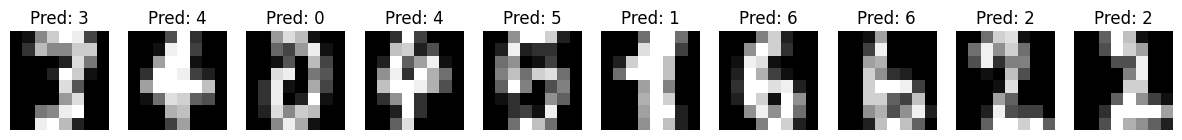

In [5]:
import matplotlib.pyplot as plt

# Visualize predictions
n_samples = 10
indices = np.random.choice(len(X_test), n_samples, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}")
    plt.axis('off')

plt.show()
